In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from decimal import Decimal

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinica_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(clinica_df, mouse_df, how='left')

# Display the data table for preview

merged_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_vol_mean = merged_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumor_vol_mean_df = pd.DataFrame(tumor_vol_mean).reset_index(drop=False)
# Preview DataFrame
tumor_vol_mean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem = merged_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_vol_sem_df = pd.DataFrame(tumor_vol_sem).reset_index(drop=False)
# Preview DataFrame
tumor_vol_sem_df.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
def mung_data(mung_df, mung_col):
    
    drug_l = [ str(i) for i in mung_df.loc[:, 'Drug'].unique() ]
    time_l = [ int(i) for i in mung_df.loc[:, 'Timepoint'].unique() ]

    drug_time = { "Drug Timepoint" : [ i for i in time_l ] }
    time_idx = { time_l[i] : i for i in range(len(time_l)) }  

    for i in drug_l:
        drugtime_values =  [0 for i in range(len(time_l))] # create all 0 list
    
        # get time stamp values for a drug
        one_drug_df = mung_df.loc[mung_df['Drug'] == i, 'Timepoint']
        for j in [i for i in one_drug_df]:
            drugtime_values[time_idx[j]] = \
                float(mung_df.loc[ (tumor_vol_mean_df['Drug'] == i) &  \
                (mung_df['Timepoint'] == j), mung_col])
                                
        drug_time[i] = drugtime_values
    
    drugtime_df = pd.DataFrame(drug_time)
    drugtime_df.set_index('Drug Timepoint', inplace=True)
    # Preview that Reformatting worked
    return drugtime_df
    

tumor_volume_df = mung_data(mung_df=tumor_vol_mean_df,mung_col='Tumor Volume (mm3)' )
tumor_volume_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Drug Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


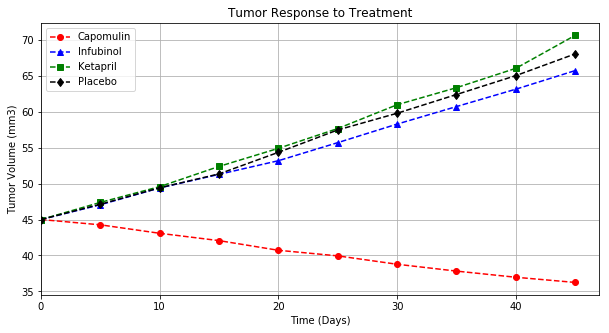

In [5]:
# Generate the Plot (with Error Bars)
multi_plot = tumor_volume_df.plot(y=['Capomulin','Infubinol','Ketapril','Placebo'],style=['ro--','b^--', 'gs--', 'kd--'], 
                               figsize=(10,5),title="Tumor Response to Treatment", grid=True)
multi_plot.set_xlabel("Time (Days)")
multi_plot.set_ylabel("Tumor Volume (mm3)")
plt.xlim(0,47)
# Save the Figure
plt.savefig("images/drug_timepoint.png")
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
met_sites_mean_df = pd.DataFrame(met_sites_mean).reset_index(drop=False)
# Preview DataFrame
met_sites_mean_df.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
met_sites_sem_df = pd.DataFrame(met_sites_sem).reset_index(drop=False)
# Preview DataFrame
met_sites_sem_df.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_df = mung_data(mung_df=met_sites_mean_df,mung_col='Metastatic Sites' )

# Preview that Reformatting worked
met_sites_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Drug Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


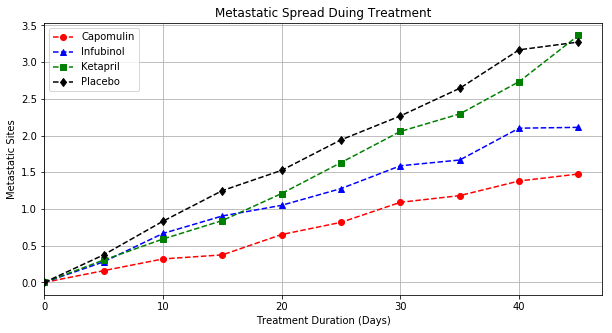

In [9]:
# Generate the Plot (with Error Bars)
multi_plot = met_sites_df.plot(y=['Capomulin','Infubinol','Ketapril','Placebo'],style=['ro--','b^--', 'gs--', 'kd--'], 
                               figsize=(10,5),title="Metastatic Spread Duing Treatment", grid=True)
multi_plot.set_xlabel("Treatment Duration (Days)")
multi_plot.set_ylabel("Metastatic Sites")
plt.xlim(0,47)
# Save the Figure
plt.savefig("images/met_sites.png")
# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = merged_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count).reset_index(drop=False)
# Preview DataFrame
mouse_count_df.head(5)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_df = mung_data(mung_df=mouse_count_df,mung_col='Mouse ID' )

# Preview that Reformatting worked
survival_rate_df


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Drug Timepoint,,,,,,,,,,
0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0
5,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0
10,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0
15,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0
20,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0
25,22.0,18.0,18.0,19.0,18.0,17.0,14.0,23.0,19.0,16.0
30,22.0,16.0,17.0,18.0,15.0,15.0,13.0,23.0,18.0,15.0
35,22.0,14.0,12.0,17.0,15.0,14.0,10.0,21.0,16.0,14.0
40,21.0,14.0,10.0,15.0,15.0,12.0,9.0,20.0,12.0,14.0


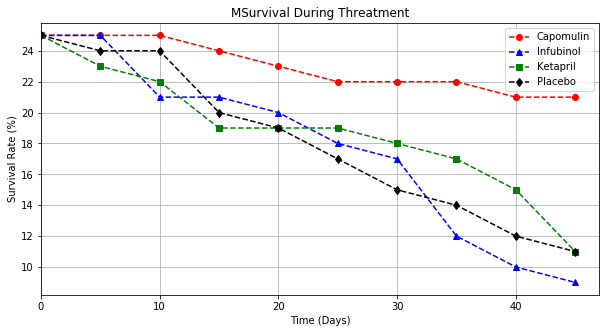

In [12]:
# Generate the Plot (with Error Bars)
multi_plot = survival_rate_df.plot(y=['Capomulin','Infubinol','Ketapril','Placebo'],style=['ro--','b^--', 'gs--', 'kd--'], 
                               figsize=(10,5),title="MSurvival During Threatment", grid=True)
multi_plot.set_xlabel("Time (Days)")
multi_plot.set_ylabel("Survival Rate (%)")
plt.xlim(0,47)
# Save the Figure
plt.savefig("images/surv_rate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug

# Display the data to confirm


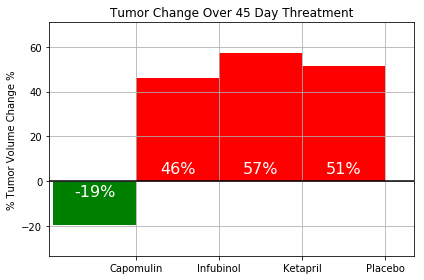

In [16]:
# Calculate the percent changes for each drug
r, c = tumor_volume_df.shape
percent_changes = tumor_volume_df.pct_change(periods=r-1).iloc[-1, :] * 100

# Display the data to confirm
pc_df = pd.DataFrame(percent_changes)
pc_df = pc_df.reset_index()
pc_df.columns = ["name", "Volums Chnage"]
pc_df = pc_df.loc[ (pc_df['name'] == 'Capomulin') | (pc_df['name'] == 'Infubinol') |
                   (pc_df['name'] == 'Ketapril') | (pc_df['name'] == 'Placebo'), : ]
pc_df.set_index('name', inplace = True)

fig = pc_df["Volums Chnage"].plot(kind='bar',align="edge", figsize=(6, 4),
             title='Tumor Change Over 45 Day Threatment', width=1,
                                  yticks = [-20,0,20,40,60],
                    color=(pc_df['Volums Chnage'] > 0).map({True: 'r', False: 'g'}))
fig.set_ylabel("% Tumor Volume Change %")
fig.set_xlabel("")
for p in fig.patches:
    x_pos = p.get_x() + p.get_width()/2
    y_pos = 2 if p.get_height() > 0 else -8
    fig.annotate('{:.2}%'.format(Decimal(str(p.get_height()))), (x_pos, y_pos),
                ha='center', va='bottom', color="w", fontsize=16)
x0, x1 = fig.get_xlim()
fig.set_xlim(x0 + 0.2, x1 + 0.1)
y0, y1 = fig.get_ylim()
fig.set_ylim(y0 - 10 , y1 + 10)
plt.xticks(ticks = [ i+1 for i in range(len(pc_df.index)) ], rotation=0)
plt.grid()
plt.hlines(0, -1, 10, alpha=1)
plt.tight_layout()
plt.show()